# Compare gridded cloud data to surface-observed clouds at a site

### Jump to [plots](#plots)

### Jump to [trends at all sites?](#trends)

### Jump to [ISCCP comparison monthly series](#ISCCP)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Open surface fileL Bahamas goes to 2020 (actually into 2021)
filename = '~/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc'
sc = xr.open_dataset(filename).to_pandas(); 

# append a column with datetime and make it the Index
sc['Datetime'] = pd.to_datetime(sc[['year', 'month', 'day', 'hour']])
sc = sc.set_index('Datetime')

# drop some redundant columns
sc.drop(['station','name','year','month','hour','day','elevation'], axis=1, inplace=True)

sc.describe()

,Unnamed: 0,lat,lon,ws,wd,n,slp,at,h,nh,cl,cm,ch,visibility,wind_speed,temp,dwpt,mslp,rain
count,99139.000000,99139.000000,99139.000000,97874.000000,97874.000000,97874.000000,98743.000000,99053.000000,78878.000000,98489.000000,98487.000000,98132.000000,96768.000000,8796.000000,27792.000000,28971.000000,28860.000000,28661.000000,14300.000000
mean,29028.418856,25.044096,-32.060575,36.848070,115.593753,4.011035,10073.717357,253.232431,4.168513,2.753455,4.386447,1.221426,0.976449,64.071510,6.631585,261.570502,216.164865,1017.429280,1.086620
std,19928.212216,0.019555,70.525272,26.087247,109.344543,2.315275,1953.990228,48.633511,1.774772,1.819157,3.360653,2.467726,1.634530,4.659894,5.505816,36.427213,39.507067,9.002105,9.618231
min,0.000000,25.000000,-77.500000,-1.000000,-1.000000,0.000000,-1.000000,-420.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,95.000000,0.000000,915.700000,0.000000
25%,12392.000000,25.038958,-77.470000,21.000000,50.000000,2.000000,10151.000000,230.000000,4.000000,1.000000,2.000000,0.000000,0.000000,63.000000,3.000000,239.000000,196.000000,1015.300000,0.000000
50%,24784.000000,25.050000,-77.470000,36.000000,100.000000,4.000000,10172.000000,254.000000,4.000000,2.000000,2.000000,0.000000,0.000000,65.000000,6.000000,264.000000,226.000000,1017.400000,0.000000
75%,45296.500000,25.050000,77.466231,51.000000,150.000000,6.000000,10193.000000,279.000000,5.000000,4.000000,8.000000,2.000000,2.000000,65.000000,9.000000,288.000000,245.000000,1019.400000,0.000000
max,70081.000000,25.500000,77.466231,509.000000,990.000000,9.000000,99999.000000,921.000000,9.000000,9.000000,11.000000,12.000000,9.000000,69.000000,99.000000,921.000000,997.000000,1818.000000,900.000000


In [3]:
sc.lon = sc.lon.min() # fix longitude to negative 

<AxesSubplot:ylabel='Frequency'>

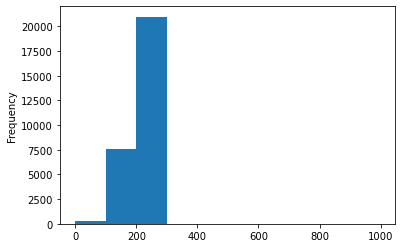

In [4]:
sc.dwpt.plot.hist() #max dewpoint is 997, mask out that whole obs

<AxesSubplot:ylabel='Frequency'>

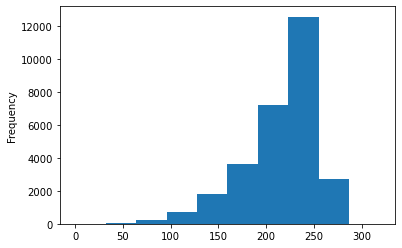

In [5]:
sc.mask(sc.dwpt > 320)['dwpt'].plot.hist() # that looks better, let's do it 

In [6]:
sc.mask(sc.dwpt > 320, inplace=True) # Throw out whole record when dwpt is absurd
sc.describe() # still a few QC issues in there, max values for instance

,Unnamed: 0,lat,lon,ws,wd,n,slp,at,h,nh,cl,cm,ch,visibility,wind_speed,temp,dwpt,mslp,rain
count,99132.000000,99132.000000,99132.0,97867.000000,97867.000000,97867.000000,98737.000000,99046.000000,78875.000000,98483.000000,98481.00000,98126.000000,96762.000000,8793.000000,27785.000000,28964.000000,28853.000000,28655.000000,14298.000000
mean,29029.583041,25.044096,-77.5,36.848243,115.588942,4.011005,10073.711375,253.234588,4.168456,2.753440,4.38643,1.221430,0.976499,64.071193,6.631564,261.579892,216.036877,1017.429325,1.086772
std,19928.309207,0.019555,0.0,26.087552,109.341210,2.315316,1954.049438,48.633369,1.774723,1.819166,3.36065,2.467717,1.634566,4.660657,5.506120,36.421203,38.465188,9.002986,9.618895
min,0.000000,25.000000,-77.5,-1.000000,-1.000000,0.000000,-1.000000,-420.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,0.000000,0.000000,95.000000,0.000000,915.700000,0.000000
25%,12392.750000,25.038958,-77.5,21.000000,50.000000,2.000000,10151.000000,230.000000,4.000000,1.000000,2.00000,0.000000,0.000000,63.000000,3.000000,239.000000,196.000000,1015.300000,0.000000
50%,24786.000000,25.050000,-77.5,36.000000,100.000000,4.000000,10172.000000,254.000000,4.000000,2.000000,2.00000,0.000000,0.000000,65.000000,6.000000,264.000000,226.000000,1017.400000,0.000000
75%,45298.250000,25.050000,-77.5,51.000000,150.000000,6.000000,10193.000000,279.000000,5.000000,4.000000,8.00000,2.000000,2.000000,65.000000,9.000000,288.000000,245.000000,1019.400000,0.000000
max,70081.000000,25.500000,-77.5,509.000000,990.000000,9.000000,99999.000000,921.000000,9.000000,9.000000,11.00000,12.000000,9.000000,69.000000,99.000000,921.000000,319.000000,1818.000000,900.000000


<a id='plots' ></a>
# Anyhoo, let's make some plots 

## Low clouds: FREQUENCY of each code, 0-9

In [7]:
# Construct one-hot encoding of lc
for i in range(10):
    cmd = "sc['lc"+str(i)+"'] = (sc['cl'] =="+str(i)+')'
    print(cmd)
    exec(cmd)

sc['lc0'] = (sc['cl'] ==0)
sc['lc1'] = (sc['cl'] ==1)
sc['lc2'] = (sc['cl'] ==2)
sc['lc3'] = (sc['cl'] ==3)
sc['lc4'] = (sc['cl'] ==4)
sc['lc5'] = (sc['cl'] ==5)
sc['lc6'] = (sc['cl'] ==6)
sc['lc7'] = (sc['cl'] ==7)
sc['lc8'] = (sc['cl'] ==8)
sc['lc9'] = (sc['cl'] ==9)


In [8]:
# Monthly mean time series, rolling mean to get seasmeans

momeans=sc.groupby([(sc.index.year),(sc.index.month)]).mean()
momeancloud = momeans[['lc0','lc1','lc2','lc3','lc4','lc5','lc6','lc7','lc8','lc9']]
seasmeans = momeancloud.rolling(3).mean()

Text(0.5, 1.0, 'DJF means')

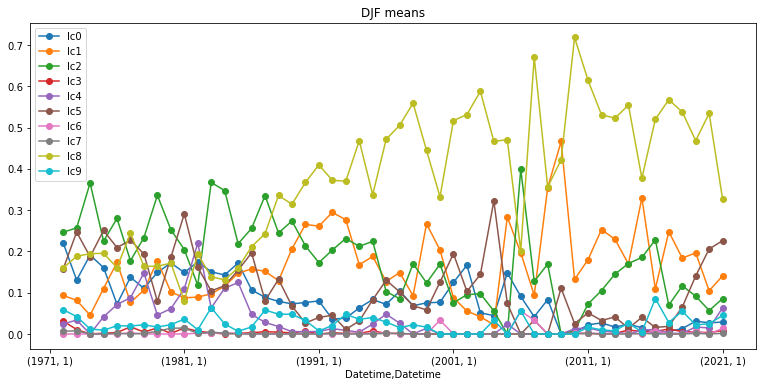

In [14]:
# Case 1b from https://stackoverflow.com/questions/53927460/select-rows-in-pandas-multiindex-dataframe
idx = pd.IndexSlice
DJFs = seasmeans.loc[idx[:, 1], :]
DJFs.plot(figsize=[13,6], marker='o'); plt.title('DJF means')

# Daily means: day-of-week x week-of-year grid

In [37]:
#https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index

# 52 weeks per year x 7 days-of-week (dow)
dowmeans = sc.groupby([(sc.index.day_of_week),(sc.index.weekofyear)]).mean()
dowmeans.lc1

/var/folders/v9/8pr92c8s0m14426rc7jfm2c80000gn/T/ipykernel_66605/2701174372.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dowmeans = sc.groupby([(sc.index.day_of_week),(sc.index.weekofyear)]).mean()


Datetime  Datetime
0         1           0.218182
          2           0.141818
          3           0.139932
          4           0.154135
          5           0.116981
                        ...   
6         49          0.134058
          50          0.194444
          51          0.188462
          52          0.149466
          53          0.036364
Name: lc1, Length: 371, dtype: float64

Text(0.5, 1.0, '53 weeks-of-year for each day-of-week')

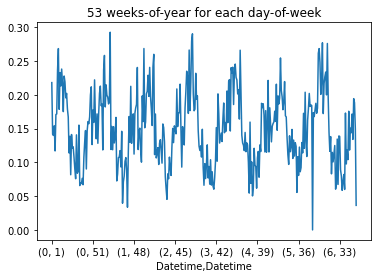

In [36]:
dowmeans.lc1.plot(); plt.title('53 weeks-of-year for each day-of-week')

Text(0.5, 0.98, '~/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc')

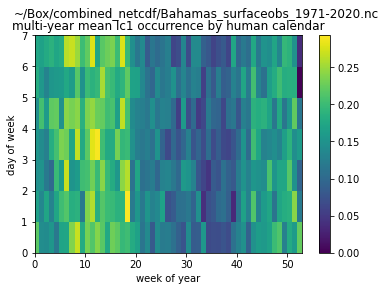

In [38]:
# Reshape to a 2D grid (7 days x 53 weeks)

plt.pcolor(dowmeans.lc1.values.reshape(7,53))
plt.colorbar()
plt.xlabel('week of year'); plt.ylabel('day of week')
plt.title('multi-year mean lc1 occurrence by human calendar')
plt.suptitle(filename)

plt.pcolor(dowmeans.lc0.values.reshape(7,53))
plt.pcolor(dowmeans.lc1.values.reshape(7,53))
plt.pcolor(dowmeans.lc2.values.reshape(7,53))
plt.pcolor(dowmeans.lc3.values.reshape(7,53))
plt.pcolor(dowmeans.lc4.values.reshape(7,53))
plt.pcolor(dowmeans.lc5.values.reshape(7,53))
plt.pcolor(dowmeans.lc6.values.reshape(7,53))
plt.pcolor(dowmeans.lc7.values.reshape(7,53))
plt.pcolor(dowmeans.lc8.values.reshape(7,53))
plt.pcolor(dowmeans.lc9.values.reshape(7,53))


Text(0.5, 0.98, '~/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc')

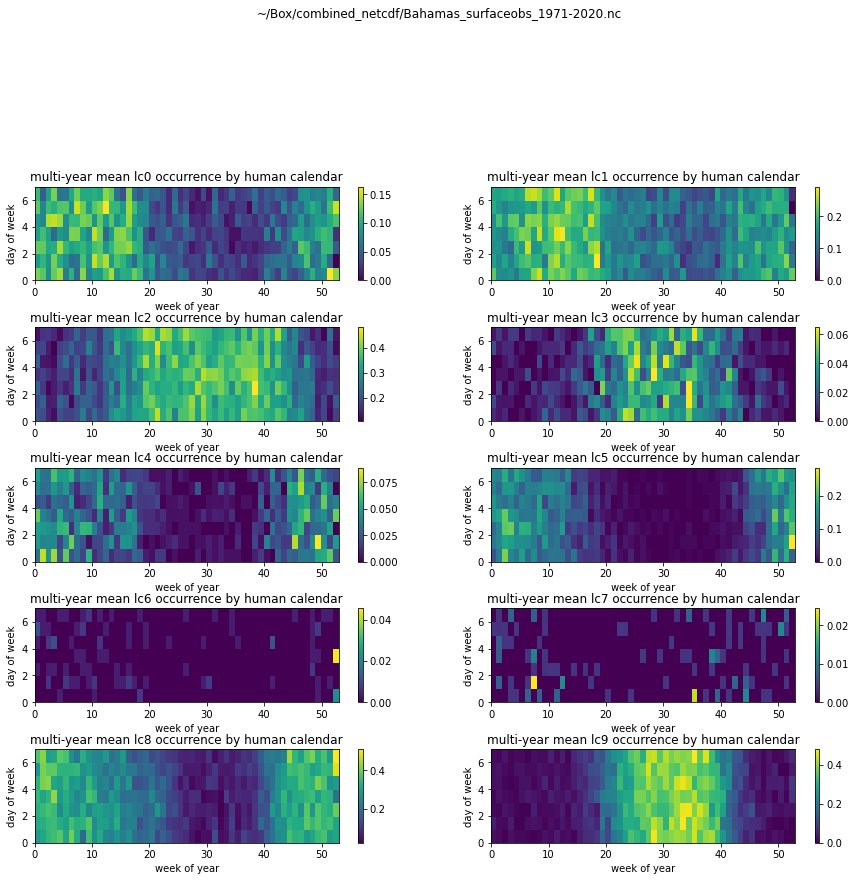

In [42]:
# Do it for all cloudtypes 

cldtypes = ['lc0','lc1','lc2','lc3','lc4','lc5','lc6','lc7','lc8','lc9']

plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)
NPLOTS = len(cldtypes)

for i,ctype in enumerate(cldtypes):
    ax = plt.subplot(NPLOTS, 2, i + 1)
    command = 'plt.pcolor(dowmeans.' + ctype + '.values.reshape(7,53))'
    print(command)
    exec(command)

    plt.colorbar()
    plt.xlabel('week of year'); plt.ylabel('day of week')
    plt.title('multi-year mean '+ctype+' occurrence by human calendar')

plt.suptitle(filename)

# How about means of individual years (retirement, etc.?) by DOW

In [45]:
dow_by_year = sc.groupby([(sc.index.day_of_week),(sc.index.year)]).mean()
dow_by_year.lc1

Datetime  Datetime
0         1971        0.071651
          1972        0.079890
          1973        0.069444
          1974        0.070028
          1975        0.191083
                        ...   
6         2017        0.137500
          2018        0.208219
          2019        0.188329
          2020        0.103550
          2021        0.244444
Name: lc1, Length: 357, dtype: float64

In [48]:
len(dow_by_year)/7

51.0

Text(0.5, 0.98, '~/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc')

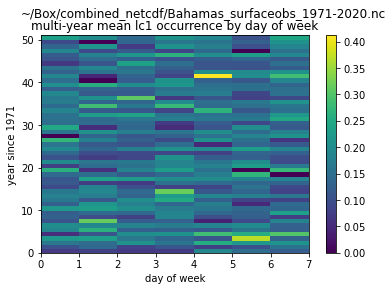

In [54]:
plt.pcolor(dow_by_year.lc1.values.reshape(51,7))
plt.colorbar()
plt.ylabel('year since 1971'); plt.xlabel('day of week')
plt.title('multi-year mean lc1 occurrence by day of week')
plt.suptitle(filename)

Text(0.5, 0.98, '~/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc')

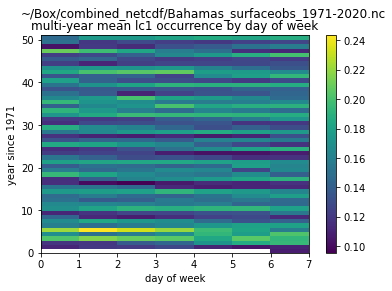

In [60]:
# TIme smoothed (7-year rolling) 
plt.pcolor(dow_by_year.lc1.rolling(7).mean().values.reshape(51,7))
plt.colorbar()
plt.ylabel('year since 1971'); plt.xlabel('day of week')
plt.title('multi-year mean lc1 occurrence by day of week')
plt.suptitle(filename)

<a id='trends'></a>

## Trends at all sites?

/Users/bem/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/Barbados_surfaceobs_1971-2015.nc
/Users/bem/Box/combined_netcdf/Bermuda_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/Cuba_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/DominicanRepublic_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/KingstonJamaica_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/Nobs
ignoring error and proceeding
/Users/bem/Box/combined_netcdf/PuertoRico_surfaceobs_1971-2020.nc


/Users/bem/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/Users/bem/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/Users/bem/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/backends/plugins.py:126: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/Users/bem/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/backends/plugins.py:126: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/Users/bem/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/backends/plugins.py:126: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!

/Users/bem/Box/combined_netcdf/PuertoVallartaMexico_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/StLucia_surfaceobs_1971-2020.nc


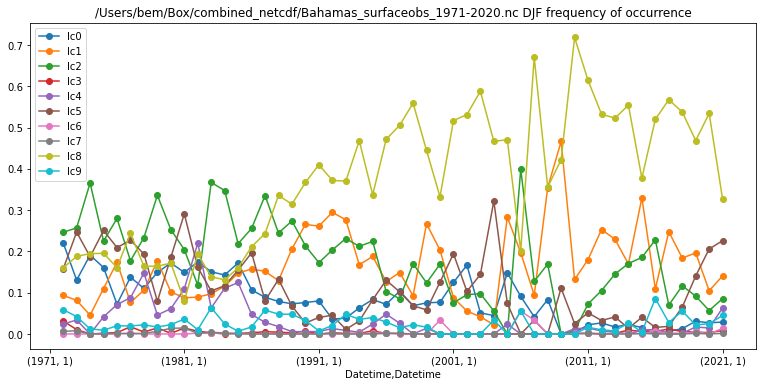

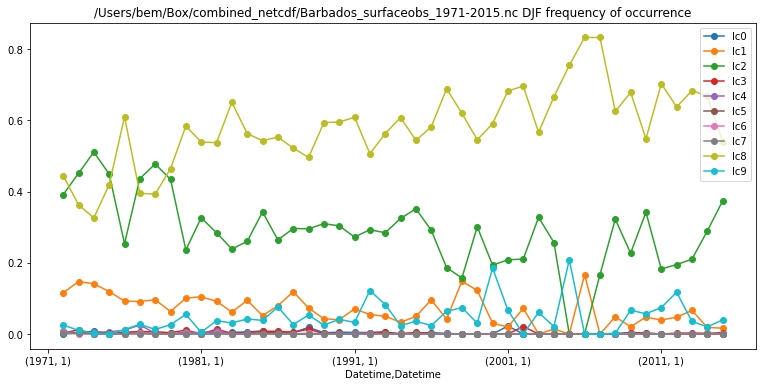

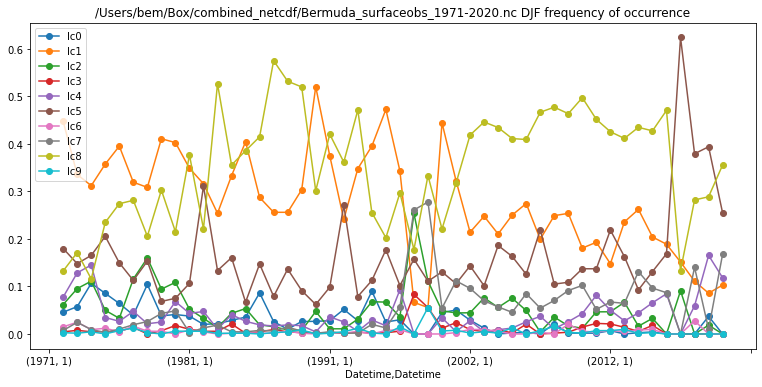

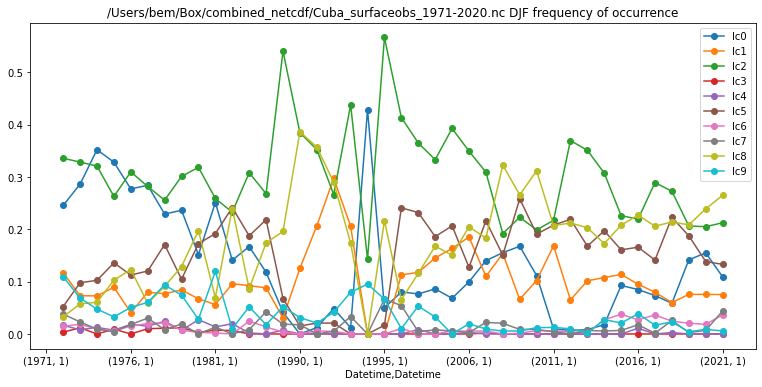

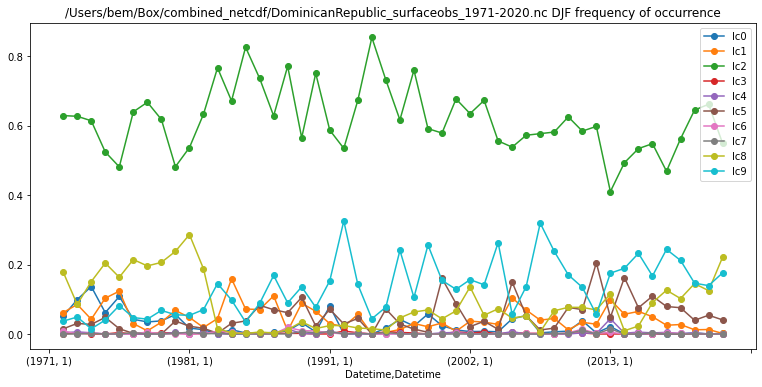

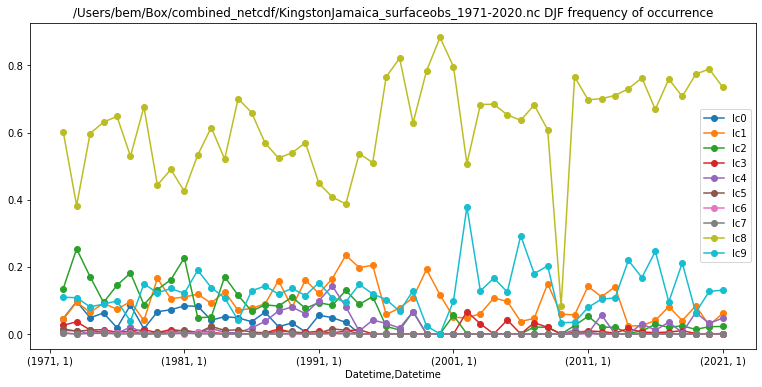

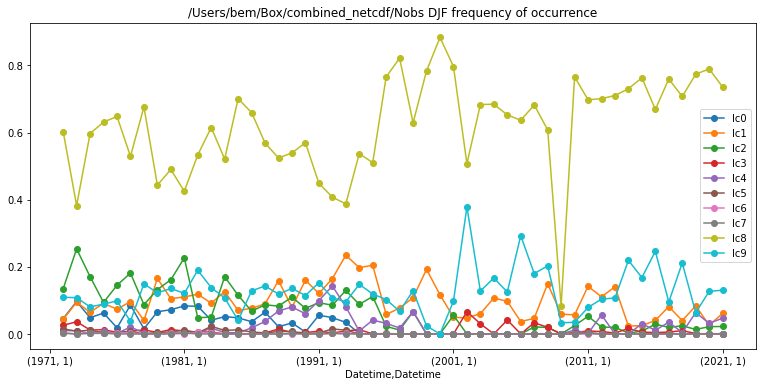

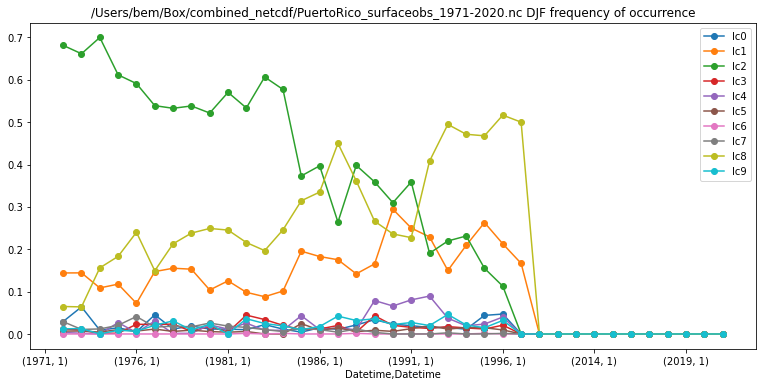

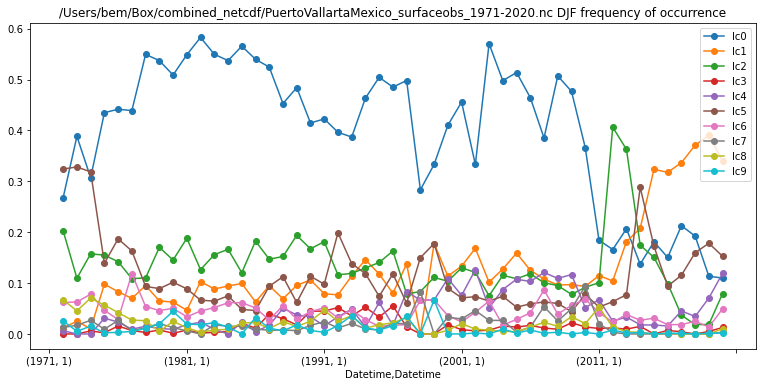

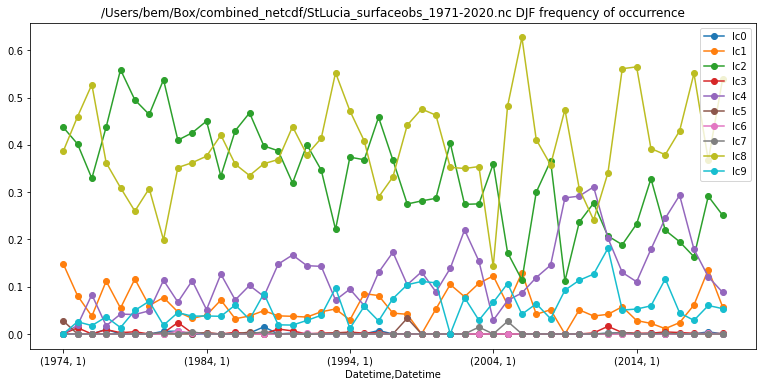

In [17]:
FOLDERNAME = '/Users/bem/Box/combined_netcdf///*'
import glob

# Loop over all files making the plots above 
for file_name in glob.glob(FOLDERNAME):
    print(file_name)
    try: 
        sc = xr.open_dataset(file_name).to_pandas()
    except:
        print('ignoring error and proceeding')
        
    # append a column with datetime and make it the Index
    sc['Datetime'] = pd.to_datetime(sc[['year', 'month', 'day', 'hour']])
    sc = sc.set_index('Datetime')
    # sc = sc.mask(sc.ch > 100) # special for St. Lucia which has an outlier in hc
    
    #Construct one-hot encoding of lc
    for i in range(10):
        cmd = "sc['lc"+str(i)+"'] = (sc['cl'] =="+str(i)+')'
        exec(cmd)

    # Monthly mean time series, rolling mean to get seasmeans
    momeans=sc.groupby([(sc.index.year),(sc.index.month)]).mean()
    momeancloud = momeans[['lc0','lc1','lc2','lc3','lc4','lc5','lc6','lc7','lc8','lc9']]
    seasmeans = momeancloud.rolling(3).mean()

    # Case 1b from https://stackoverflow.com/questions/53927460/
    #        select-rows-in-pandas-multiindex-dataframe
    idx = pd.IndexSlice
    DJFs = seasmeans.loc[idx[:, 1], :]
    DJFs.plot(figsize=[13,6],marker='o',title=file_name+' DJF frequency of occurrence')

<a id='ISCCP'></a>

## Compare monthly ISCCP cloud grid cell at this location

In [11]:
# URL = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/dods/M2TMNXRAD' # MERRA2 clouds, requires some authentication

In [11]:
# ISCCP grids in OpenDap server at Hawaii: 

URL = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/isccp/isccp_mon'
IS = xr.open_dataset(URL)


/Users/bem/miniconda3/envs/MPO624/lib/python3.8/site-packages/xarray/coding/times.py:144: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


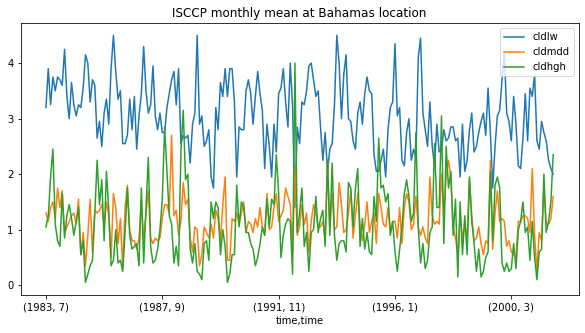

In [12]:
# Select Bahamas point, call it xBAH for xarray, BAH for pandas frame
# CAREFUL with LON!! -- but in this case both datasets use negative for lonW. 

xBAH = IS.sel(lat=sc.lat.mean(), lon=sc.lon.mean(), method='nearest'); xBAH;

# convert to Pandas for a multi-line plot, and change units to tenths (seems to be the surface unit although it goes to 11

BAH = xBAH[['cldlw','cldmdd','cldhgh']].squeeze().drop_vars(['lat','lon','lev']).to_pandas()
# Make monthly means, not artificially on 15th of the month
BAH = BAH.groupby([BAH.index.year, BAH.index.month]).mean()/10

BAH.plot(figsize=[10,5]); plt.title('ISCCP monthly mean at Bahamas location');

In [ ]:
# lc With ISCCP: 

pd.concat([momeancloud,BAH], axis=1).plot(figsize=[15,5],title=file_name);


NameError: name 'file_name' is not defined